# Perkenalan

---

Program ini dibuat untuk melakukan analisis data secara visual dan statistik untuk secara spesifik melakukan analisa terhdap data terkait gaji pegawai untuk mengidentfikasi keterkaitannya dengan adanaya kesenjangan diantara gender laki-laki dan perempuan.   

---

# Identifikasi Masalah

**Topik Permasalahan:**    
Kesenjangan upah gender merupakan problema yang dari sejak dahulu sering dianalisis di berbagai belahan dunia. Beberapa studi terdahulu menunjukkan bahwa kesenjangan upah antara laki-laki dan perempuan masih menjadi persoalan bahkan dengan pendidikan dan pengalaman yang sebanding, kesenjangan upah berbasis gender dapat terjadi di berbagai sektor. Analisis data ini bertujuan untuk mengidentifikasi apakah pada tahun 2023 masih terdapat kesenjangan penghasilan antar gender.  

**Problem Statement**    
Analisis ini menggunakan SMART framework untuk menjelaskan topik permasalahan yang akan dianalisa. Berikut ini untuk penjelasannya:    
<u>Spesific:</u> Mengidentifikasi kesenjangan upah antar gender secara spesifik untuk karyawan dengan pengalaman kerja 5-15 tahun dan memiliki gelar Sarjana dan atau Pascasarjana.    
<u>Measurable:</u> Pengukuran adanya kesenjangan upah antar gender dapat diukur dengan membandingkan gaji rata-rata antar laki-laki dan perempuan melalui analisis data dan uji statistik.    
<u>Achievable:</u> Analisis ini dapat dilakukan dengan diperolehnya informasi yang lengkap terkait dengan data gender, pengalaman, dan tingkat pendidikan, serta gaji pegawai yang diakses melalui website komunitas data online Kaggle.    
<u>Relevant:</u> Mengidentifkasi permasalahan kesenjangan upah antar gender adalah topik penting untuk dibahas khususnya terkait dengan peningkatan upaya inklusivitas dan kesetaraan hak .    
<u>Time-bound:</u> Analisis ini ditargetkan dapat selesai dalam kurun waktu kurang dari satu minggu.    

Berdasarkan perincian SMART framework diatas, Problem Statemnet pada analisis ini adalah **"Menentukan apakah ada kesenjangan upah antar gender yang signifikan di antara karyawan yang memiliki pengalaman kerja 5-15 tahun dan telah memiliki gelar Sarjana dan atau Pascasarjana, yang dapat diupayakan melalui hasil analisis data dengan target penyelesaian kurang dari satu minggu".**

Penjabaran masalah menggunakan 5W1H:   
<ul>
<li> Di antara gender laki-laki atau perempuan, siapa yang menerima upah rata-rata lebih tinggi untuk jabatan yang sama?   
<li> Apakah terdapat jabatan tertentu yang spesifik terjadi kesenjangan upah paling ekstrim?    
<li> Pada waktu membandingkan karyawan berdasarkan umur, apakah karyawan yang lebih muda atau lebih tua yang lebih terdampak terhadap kesenjangan?
<li> Di bagian mana perbedaan upah ini paling nyata – middle level, level junior, atau posisi senior?    
<li> Mengapa ada kemungkinan karyawan dengan berbeda gender tetapi dengan pengalaman kerja dan tingkat pendidikan yang sama tidak menerima gaji yang sama juga?    
<li> Bagaimana hasil analisis ini dapat memberikan insight terhadap kondisi keseteraan dan keadilan di dalam dunia kerja saat ini?
</li>

# Data Loading

**Sumber referensi data:**  
Data ini diperoleh dengan lisensi dari website kaggle dengan link sebagai berikut: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data?datasetId=3282301&sortBy=dateRun

In [1]:
# Instalasi Library
import pandas as pd
import numpy as np

In [2]:
# Eksplorasi sampel data dengan menampilkan 5 baris data teratas 
data = pd.read_csv('Salary_Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# Menentukan data yang akan digunakan untuk analisis
# Filtering data'Education Level'
education_filter = data['Education Level'].str.contains('bachelor|master', case=False, na=False)

# Filtering data 'Gender'
gender_filter = data['Gender'].isin(['Male', 'Female'])

# Filtering 'Years of Experience'
experience_filter = (data['Years of Experience'] >= 5) & (data['Years of Experience'] <= 15)

# Filtering seluruh data:
df = data[education_filter & gender_filter & experience_filter]


In [4]:
# Eksplorasi jumlah data dan jenis data
print("\nRingkasan Data:")
print()
ringkasan_data = df.info()
print(ringkasan_data)


Ringkasan Data:

<class 'pandas.core.frame.DataFrame'>
Index: 2604 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2604 non-null   float64
 1   Gender               2604 non-null   object 
 2   Education Level      2604 non-null   object 
 3   Job Title            2604 non-null   object 
 4   Years of Experience  2604 non-null   float64
 5   Salary               2602 non-null   float64
dtypes: float64(3), object(3)
memory usage: 142.4+ KB
None


Eksplorasi Data:
<ul>
<li> Data ini adalah dataset dari komunitas data online Kaggle yang bedasarkan sumbernya merupakan bagian dari kumpulan data yang diperoleh dari berbagai sumber, termasuk survei, situs lowongan pekerjaan, dan sumber lain yang tersedia untuk umum. Secara keseluruhan, dataset ini memiliki 6704 data poin yang mencakup lima variabel: usia (`Age`), gender (`Gender`), tingkat pendidikan (`Education Level`), jabatan (`Job Title`), pengalaman kerja (`Years of Experience`), dan gaji (`Salary`).
</ul>
<ul>
<li> Informasi kolom pada Dataframe:</ul>
<ul>
<div style="margin-left: 20px"><li> `Age` merupakan identitas umur pekerja, bertipe data numerik (float), teridentifikasi terdapat 2 nilai yang tidak ditemukan di dalam data (null value) 
    <li> `Gender` merupakan identitas gender pekerja, bertipe data non numerik (string data)
    <li> `Education Level` merepresentasikan tingkat pendidikan akhir yang dimiliki oleh pekerja, bertipe data non numerik (string data)
    <li> `Job Title` merupakan jabatan yang dimiliki oleh pekerja, bertipe data non numerik (string data)
    <li> `Years of Experience` merepresentasikan pengalaman kerja yang dimiliki, bertipe data numerik (float)
    <li> `Salary` merepresentasikan data gaji pekerja per tahun, bertipe data numerik (float) </ul> </div> 


In [5]:
# Mengidentifikasi missing values di dalam data
missing_values = df.isna().sum()
print("Nilai Missing values per kolom:")
print(missing_values)

Nilai Missing values per kolom:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
dtype: int64


Variabel `Salary` terdapat 2 nilai standard numerik missing value, sehingga untuk keperluan analisis perlu dihapus datanya 

In [6]:
# Mengidentifikasi non-standard missing values
non_standard_na = ['?', '-', 'NA', 'n/a', 'none', '']

# Cek keadaan non-standard missing values
data_missing = df.isin(non_standard_na).any()

# Menampilkan kolom yang terdapat non-standard missing values
print(data_missing[data_missing == True])


Series([], dtype: bool)


Berdasarkan hasil eksplorasi, tidak ditemukan adanya non-standard missing values pada data ini

In [7]:
# Mengidentifikasi nilai unik pada data
unique_data = df.nunique()
print(unique_data)

Age                     22
Gender                   2
Education Level          4
Job Title              104
Years of Experience     11
Salary                 186
dtype: int64


In [8]:
# Eksploarasi data pada kolom 'Education Level'
print(df['Education Level'].value_counts())

Education Level
Master's Degree      1154
Bachelor's Degree     869
Bachelor's            376
Master's              205
Name: count, dtype: int64


Pada kolom `Education Level` terdapat data yang perlu dikoreksi terkait adanya tidak sinkron penulisan gelar

In [9]:
# Eksploarasi data pada kolom 'Age'
print(df['Age'].value_counts())

Age
33.0    342
32.0    302
30.0    262
31.0    240
34.0    211
36.0    181
35.0    151
37.0    138
38.0    125
29.0    121
39.0    109
42.0    102
28.0     98
41.0     58
40.0     40
44.0     36
43.0     26
26.0     20
45.0     19
27.0     15
46.0      6
50.0      2
Name: count, dtype: int64


Berdasarkan hasil eksplorasi pada kolom `Age`, tidak ditemukan data terkait umur yang tidak wajar

In [10]:
# Eksploarasi data pada kolom 'Job Title'
print(df['Job Title'].value_counts())

Job Title
Product Manager         230
Full Stack Engineer     214
Software Engineer       202
Marketing Manager       187
Data Analyst            170
                       ... 
Software Manager          1
Product Designer          1
Marketing Specialist      1
Project Engineer          1
UX Designer               1
Name: count, Length: 104, dtype: int64


Berdasarkan hasil eksplorasi pada kolom `Job Title`, ditemukan data terkait pekerjaan yang tidak wajar, memiliki nilai hanya 1, sehingga terkait keberadaanya perlu dihapus

In [11]:
# Eksploarasi data pada kolom 'Years of Experience'
print(df['Years of Experience'].value_counts())

Years of Experience
6.0     416
5.0     379
8.0     365
9.0     335
7.0     293
11.0    237
14.0    154
12.0    151
10.0    133
13.0    108
15.0     33
Name: count, dtype: int64


Berdasarkan hasil eksplorasi pada kolom `Years of Experience`, tidak ditemukan data terkait pengalaman kerja yang tidak wajar

In [12]:
# Eksploarasi data pada kolom 'Salary'
print(df['Salary'].value_counts())

Salary
120000.0    246
160000.0    147
130000.0    144
140000.0    139
110000.0    126
           ... 
136285.0      1
99363.0       1
123386.0      1
135853.0      1
102465.0      1
Name: count, Length: 186, dtype: int64


Pada kolom `Salary`, nilai ini merupakan total upah yang diterima per tahun oleh pegawai dengan asumsi nilai US dolar, terdapat beberapa nilai yang identik, dari sumber data tidak menyediakan informasi yang jelas terkait dengan informasi nilai tersebut

# Cleaning data

Tahap-tahap yang dilakukan dalam pembersihan data:
<ul>
<li> Menghapus nilai missing values yang terdapat di dalam data
<li> Melakukan perbaikan atas format yang tidak konsisten pada data
<li> Menghapus variabel pada data yang tidak relevan untuk dilakukan analisis
<li> Menghapus whitespasces untuk mencegah adanya bias pada nama variabel data
<li> Memperbaiki penamaan kolom agar seusai dengan konvensi penamaan yang baik  

In [13]:
# Menghapus nilai missing values:
df.dropna(inplace=True)

missing_values = df.isna().sum()
print('Mengecek nilai missing value')
print(missing_values)

Mengecek nilai missing value
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


/var/folders/5t/dqwb2f6d0slbyby1436_p8h40000gn/T/ipykernel_58056/1848126743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
# Memperbaiki nilai pada kolom 'Education Level'
replace_data = {
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree"
}

# Menggunakan meotde replace untuk mengganti nilai yang salah
df['Education Level'] = df['Education Level'].replace(replace_data)

# Mengecek Data yang sudah dibersihkan
print(df['Education Level'].value_counts())

Education Level
Master's Degree      1358
Bachelor's Degree    1244
Name: count, dtype: int64


/var/folders/5t/dqwb2f6d0slbyby1436_p8h40000gn/T/ipykernel_58056/2197188331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace(replace_data)


In [15]:
# Menghapus data yang tidak diperlukan untuk dianalisis
counts = df['Job Title'].value_counts()

# Filter terhadap data yang akan dihapus
data_filter = counts[counts > 10].index

# Menghapus nilai dari dataframe
df = df[df['Job Title'].isin(data_filter)]

# Mengecek Data yang sudah dibersihkan
print(df['Job Title'].value_counts())


Job Title
Product Manager                     230
Full Stack Engineer                 213
Software Engineer                   202
Marketing Manager                   187
Data Analyst                        170
Senior Software Engineer            130
Data Scientist                      119
Operations Manager                  110
Back end Developer                  110
Human Resources Manager             104
Marketing Coordinator                88
Software Engineer Manager            87
Front end Developer                  77
Senior Project Engineer              77
Marketing Director                   64
Financial Manager                    59
Sales Director                       41
Web Developer                        39
Sales Manager                        36
Digital Marketing Manager            35
Senior HR Generalist                 32
Content Marketing Manager            31
Software Developer                   31
Director of Marketing                26
Junior Marketing Manager      

In [16]:
# Menghapus whitespace pada kolom 'Job Title'
df['Job Title'] = df['Job Title'].str.strip()

In [17]:
# Merubah nama kolom dengan seusai dengan konvensi penamaan yang baik
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Education Level': 'education_level',
    'Job Title': 'job_title',
    'Years of Experience': 'years_of_experience',
    'Salary': 'salary'
}, inplace=True)

# Menampilkan nama kolom yang sudah dibersihkan
print(df.columns)

Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')


# Analisis dan Perhitungan

## Analisis data untuk mengidentifikasi apakah terdapat kesenjangan antara rata-rata upah yang diterima oleh Laki-laki dan Perempuan untuk jabatan yang sama?

In [18]:
# Instalasi library terkait visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Mengelompokkan job_title untuk mendapatkan perhitungan rata-rata gaji pegawai
job_group = df.groupby(['job_title', 'gender']).agg({'salary': 'mean', 'gender': 'size'}).rename(columns={'gender': 'count'}).reset_index()

In [20]:
# Menghitung perbedaan jumlah data pegawai antar gender dan meminimalisir kesenjangan data
gender_diff = job_group.pivot(index='job_title', columns='gender', values='count').fillna(0)
gender_diff['Difference'] = abs(gender_diff['Male'] - gender_diff['Female'])
filtered_jobs = gender_diff[gender_diff['Difference'] < 35].index.tolist()

In [21]:
# Memfilter jumlah data yang sudah diperhitungkan secara proporsional
filtered_grouped = job_group[job_group['job_title'].isin(filtered_jobs)]

In [22]:
# Memfilter data yang akan dimasukkan ke dalam Grafik berdasarkan Top 10 job_title dengan jumlah data kedua gender yang paling banyak
top_10_jobs = filtered_grouped.groupby('job_title').agg({'count': 'sum'}).sort_values(by='count', ascending=False).head(10).index.tolist()
data_grafik1 = filtered_grouped[filtered_grouped['job_title'].isin(top_10_jobs)]


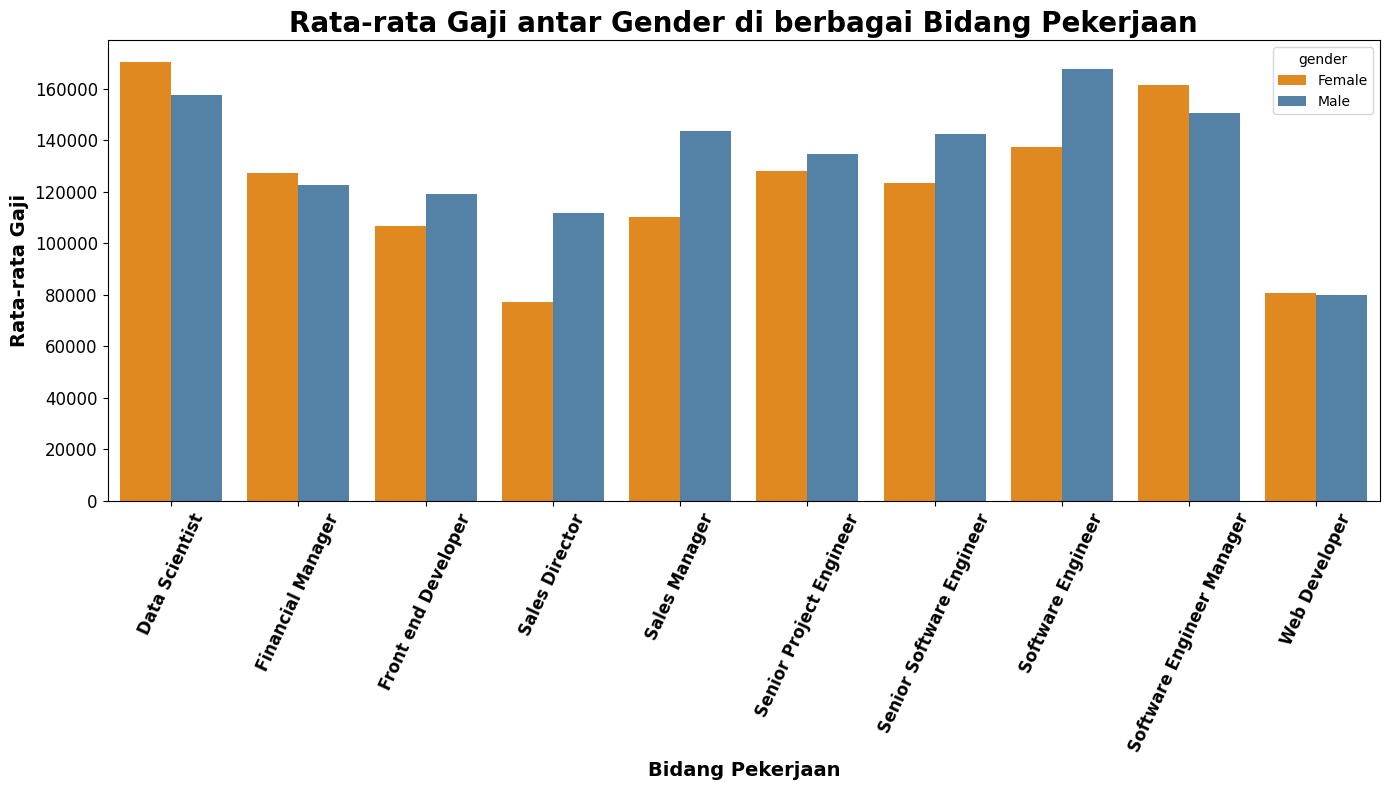

In [23]:
plt.figure(figsize=(14, 8))

# Mengatur unsur warna grafis
gender_palette = {
    'Male': 'steelblue',
    'Female': 'darkorange'
}

# Membuat grafik batang
sns.barplot(x='job_title', y='salary', hue='gender', data=data_grafik1, errorbar=None, palette=gender_palette)

# Membuat Judul
plt.title("Rata-rata Gaji antar Gender di berbagai Bidang Pekerjaan", fontsize=20, fontweight='bold')

# Menentukan sumbu x dan sumbu y
plt.ylabel("Rata-rata Gaji", fontsize=14, fontweight='bold')
plt.xlabel("Bidang Pekerjaan", fontsize=14, fontweight='bold')


plt.xticks(rotation=65, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

**Analisis Kesenjangan Upah Gender pada Bidang Pekerjaan yang sama:**   
Dalam data visualisasi ini tentang perbedaan gaji berdasarkan jenis kelamin di berbagai jabatan, mayoritas menunjukkan perbedaan upah yang relatif kecil antara karyawan pria dan wanita. Ini merupakan indikasi positif bahwa dalam banyak profesi, kompensasi tampak lebih netral terhadap gender. Sementara kesenjangan upah gender secara historis lebih sering dijumpai laki-laki di banyak industri, analisis data ini menunjukkan penyimpangan yang menarik dari tren ini dalam bidang teknologi tertentu secara khusus, dalam peran 'Data Science' dan 'Software Engineer Manager', gaji perempuan tampaknya sedikit lebih tinggi daripada laki-laki. Faktor yang dapat mendasari hal ini adalah background pendidikan & peningkatan keterampilan sangat penting dalam bidang teknologi, mungkin saja perempuan dalam peran ini mengejar gelar atau sertifikasi yang lebih tinggi, sehingga memberi sedikit keunggulan dalam negosiasi gaji atau ini juga bisa merupakan anomali Statistik, jika ternyata jumlah data perempuan dalam jabatan ini relatif kecil, beberapa gaji tinggi dapat mendongkrak rata-rata.

Namun, sangat penting untuk mempelajari lebih dalam area di area ternetu, seperti pada tiga jabatan, yaitu 'Sales Director', 'Sales Manager', dan 'Software Engineer'. menunjukkan kesenjangan upah yang mencolok, dengan gaji laki-laki cukup jauh melebihi gaji  perempuan.   

Penjelasan & Investigasi Lebih Lanjut:  
<ul> 
<li> Pengalaman & Masa Jabatan: Meskipun data ini memperhitungkan jabatan, mungkin ada perbedaan mendasar terkait pengalaman atau masa jabatan. Misalnya, jika lebih banyak laki-laki dalam peran 'Software Engineer' telah menduduki posisi lebih lama daripada perempuan, mereka mungkin berpenghasilan lebih tinggi karena senioritas.
<li> Perbedaan skill Negosiasi: Dalam industri tertentu, seperti di bidang penjualan, 'Sales Director' dan 'Sales Manager', gaji terkadang dapat dipengaruhi oleh keterampilan negosiasi. Penelitian telah menunjukkan bahwa pria cenderung bernegosiasi lebih agresif daripada wanita, yang mungkin menghasilkan gaji awal yang lebih tinggi atau kenaikan gaji yang lebih signifikan dari waktu ke waktu.</ul>

## Analisis data untuk mengidentifikasi apakah terdapat jabatan tertentu yang spesifik terjadi kesenjangan upah paling ekstrim? 

In [24]:
# Mengelompokkan job_title untuk mendapatkan perhitungan rata-rata gaji pegawai
job_group2 = df.groupby(['job_title', 'gender']).agg({'salary': 'mean', 'gender': 'size'}).rename(columns={'gender': 'count'}).reset_index()

In [25]:
# Menghitung perbedaan jumlah data pegawai antar gender dan meminimalisir kesenjangan data
gender_diff_count = job_group2.pivot(index='job_title', columns='gender', values='count').fillna(0)
criteria = (gender_diff_count['Male'] >= 30) & (gender_diff_count['Female'] >=30) & (np.abs(gender_diff_count['Male'] - gender_diff_count['Female']) < 60)
filtered_jobs2 = gender_diff_count[criteria].index.tolist()

In [26]:
# Memfilter job_title yang memenuhi kriteria
filtered_grouped2 = job_group2[job_group2['job_title'].isin(filtered_jobs2)]

In [27]:
# Menghitung perbedaan gaji antar gender untuk setiap masing-masing job_title
gender_diff_salary = filtered_grouped2.pivot(index='job_title', columns='gender', values='salary').fillna(0)
gender_diff_salary['salary_difference'] = np.abs(gender_diff_salary['Male'] - gender_diff_salary['Female'])

In [28]:
# Memfilter data untuk dimasukkan ke dalam grafik (berdasarkan perhitungan kesenjangan upah)
extreme_salary_diff = gender_diff_salary.sort_values(by='salary_difference', ascending=False).head(4)
extreme_salary_diff = extreme_salary_diff.reset_index()

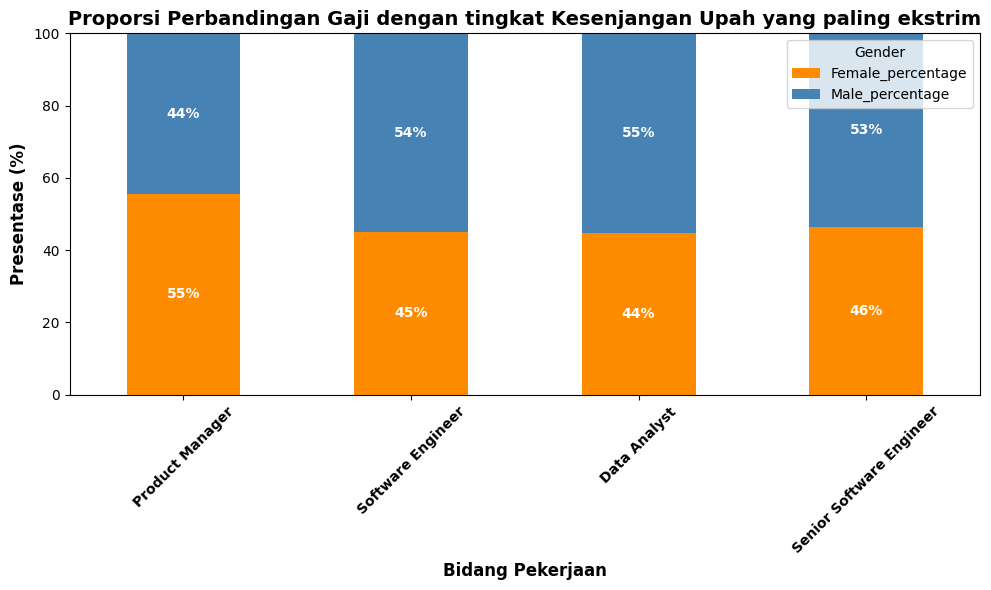

In [29]:
# Konversi nilai pada kolom 'salary' menjadi poin presentase
extreme_salary_diff['Female_percentage'] = extreme_salary_diff['Female'] / (extreme_salary_diff['Female'] + extreme_salary_diff['Male']) * 100
extreme_salary_diff['Male_percentage'] = extreme_salary_diff['Male'] / (extreme_salary_diff['Female'] + extreme_salary_diff['Male']) * 100

# Membuat chart
fig, ax = plt.subplots(figsize=(10, 6))

extreme_salary_diff.plot(kind='bar', x='job_title', y=['Female_percentage', 'Male_percentage'], stacked=True, ax=ax, color=['darkorange', 'steelblue'])

# Cara menampilkan poin presentase didalam chart
for idx, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_x() + rect.get_width()/2
    ax.text(width, rect.get_y() + height/2, f"{int(height)}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Judul dan label
ax.set_title('Proporsi Perbandingan Gaji dengan tingkat Kesenjangan Upah yang paling ekstrim', fontsize=14, fontweight='bold')
ax.set_xlabel('Bidang Pekerjaan', fontsize=12, fontweight='bold')
ax.set_ylabel('Presentase (%)', fontsize=12, fontweight='bold')
ax.set_xticklabels(extreme_salary_diff['job_title'], rotation=45, fontweight='bold')
ax.set_ylim(0, 100)  # y-axis set dari  0 sd 100 untuk presentase
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


**Analisis terhadap kesenjangan upah yang ekstrim:**   
Dalam analisis ini ditemukan bahwa data menunjukkan untuk jabatan 'Product Manager', perempuan dibayar secara signifikan lebih tinggi daripada rekan kerja laki-laki. Beberapa faktor dapat menyebabkan perbedaan ini. Dalam hal ini terdapat juga kemungkinan dipengaruhi oleh faktor eksternal lainnya seperti ukuran sampel, perusahaan yang dipertimbangkan, atau tanggung jawab pekerjaan tertentu dan spesialisasi pada kumpulan data ini. Mungkin juga pada data ini, wanita memiliki lebih banyak pengalaman atau telah mencapai kualifikasi pendidikan yang lebih tinggi, sehingga menghasilkan gaji yang lebih tinggi.    

Di sisi lain, terdapat kesenjangan upah yang dapat dikatakan cukup ekstrim yang berpihak pada laki-laki dalam tiga jabatan pada bidang pekerjaan industri teknologi. Ini bisa menjadi manifestasi dari masalah kesenjangan upah gender yang lebih luas di industri teknologi, di mana bias, baik eksplisit maupun implisit, mungkin masih ada. Untuk menggali lebih dalam, kita memerlukan perincian data yang lebih terperinci, memeriksa faktor-faktor seperti pengalaman kerja yang dimiliki, latar belakang pendidikan, dan lain-lain.

## Analisis data untuk mengidentifikasi apakah karyawan yang lebih muda atau lebih tua yang lebih terdampak terhadap kesenjangan?

In [30]:
# Membuat age_group berdasarkan rentang usia pekerja
bins = [25, 35, 45, 55, 65]
labels = ['25-35', '35-45', '45-55', '55-65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped_age = df.groupby(['age_group', 'gender']).salary.mean().unstack().head(3)

# Menghitung selisih gaji antar gender
grouped_age['difference'] = grouped_age['Male'] - grouped_age['Female']


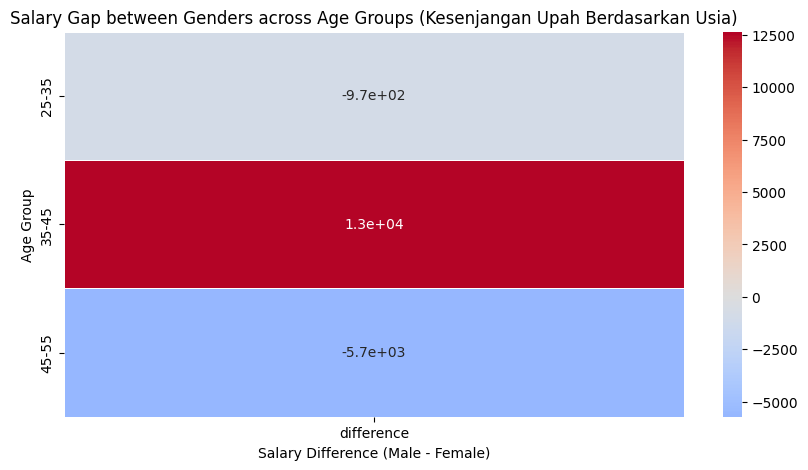

In [31]:
# Membuat grafik
plt.figure(figsize=(10, 5))
sns.heatmap(grouped_age[['difference']], annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Salary Gap between Genders across Age Groups (Kesenjangan Upah Berdasarkan Usia)')
plt.ylabel('Age Group')
plt.xlabel('Salary Difference (Male - Female)')
plt.show()

**Analisis terhadap kesenjangan upah gender berdasarkan golongan usia:**    
Pada level usia muda, khususnya antara usia 25 hingga 35 tahun, analisis data ini menunjukkan tidak ada kesenjangan upah antar jenis kelamin yang signifikan. Keseimbangan ini mungkin terkait inklusivitas tempat kerja yang berkembang yang mengakui dan menghargai bakat, tanpa memandang jenis kelamin, terutama saat karyawan berada di awal perjalanan karier mereka. Beberapa faktor dapat berkontribusi terhadap hal ini. Praktik perekrutan modern, program pelatihan yang terfokus, dan perubahan generasi dalam memahami peran gender mungkin menjadi faktor utama yang mendukung narasi ini 

Namun, saat beralih ke kelompok usia menengah pada rentang 35-45 tahun, perbedaan gaji antar gender yang mencolok muncul, dengan penghasilan rata-rata laki-laki jauh lebih tinggi daripada rekan kerja perempuan. Kesenjangan ini mungkin berasal dari berbagai faktor sosial budaya dan organisasi: Wanita, seringkali karena tanggung jawab keluarga, mungkin mengambil jeda karier atau memilih peran paruh waktu, yang memengaruhi perkembangan gaji mereka, sedangkan laki-laki dituntut untuk bekerja keras sebagai kepala keluarga, penelitian juga telah menunjukkan bahwa pria terkadang lebih agresif dalam menegosiasikan gaji atau kenaikan gaji. Menariknya, pada tahap usia lanjut usia profesioanal (usia 45-55), data ini menunjukkan terjadi pembalikan tren, dimana wanita tampaknya berpenghasilan lebih tinggi daripada pria, namun perbedaannya tidak mencolok. Ini bisa disebabkan oleh wanita mungkin banyak bertahan dalam karier mereka, sementara pria cenderung beralih profesi menjadi pengusaha atau pensiun setelah berada di puncak karir mereka atau bisa juga ini terkait dengan kebijakan kompensasi perusahaan terentu untuk pegawai lanjut usia.

## Analisis data untuk Mengidentifikasi di bagian mana perbedaan upah ini paling nyata – middle level, level junior, atau posisi senior?

In [32]:
# Mengelompokkan 'experience_level' berdasarkan tahun penghalmaan kerja pada 'years_of_experience'
conditions = [
    (df['years_of_experience'] >= 5) & (df['years_of_experience'] <= 7),
    (df['years_of_experience'] >= 8) & (df['years_of_experience'] <= 11),
    (df['years_of_experience'] >= 12) & (df['years_of_experience'] <= 15)
]

values = ['Junior', 'Mid-Level', 'Senior']

df['experience_level'] = pd.cut(df['years_of_experience'], bins=[4, 7, 11, 15], labels=values, right=True)

# Menghitung rata-rata 'salary' berdasarkan kelompok gender dan level experience
grouped = df.groupby(['experience_level', 'gender'])['salary'].mean().reset_index()


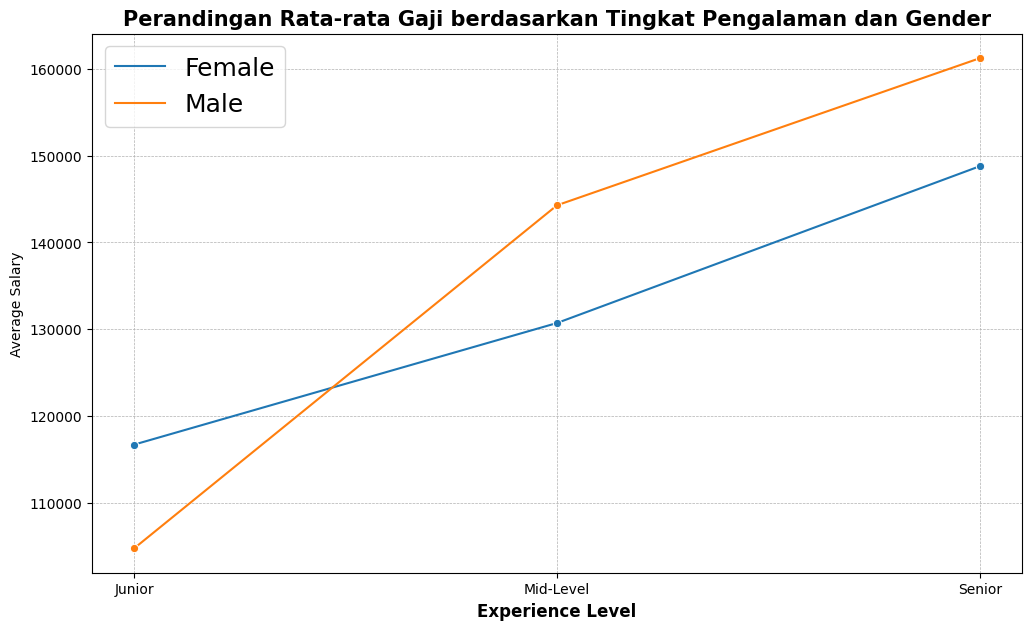

In [33]:
# Membuat line chart
plt.figure(figsize=(12, 7))
sns.lineplot(x='experience_level', y='salary', hue='gender', data=grouped, marker='o', errorbar=None)
plt.title('Perandingan Rata-rata Gaji berdasarkan Tingkat Pengalaman dan Gender', fontsize=15, fontweight='bold')
plt.ylabel('Average Salary')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=18)
plt.show()

**Analisis kesetraaan gaji antar gender pada tingkat pengalaman yang berbeda:**    
Dalam analisis data ini, pola yang menarik muncul saat memeriksa kesenjangan upah gender di berbagai tingkat pengalaman profesioanal. Di tingkat junior, karyawan perempuan tampaknya mendapatkan gaji lebih tinggi daripada rekan pria mereka. Ini bisa menjadi indikasi upaya baru-baru ini oleh organisasi untuk mempromosikan kesetaraan gender. dan memastikan kompensasi yang adil, terutama bagi mereka yang memasuki dunia kerja. Namun, saat melihat tren pada posisi tingkat menengah dan senior, data menunjukkan adanya perubahan secara signifikan. Data mengungkapkan kesenjangan gaji yang melebar, dengan karyawan perempuan konsisten berpenghasilan rata-rata lebih lebih rendah daripada laki-laki. Beberapa faktor mungkin menjelaskan tren ini: peranan dari senior yang mungkin masih didominasi mayoritas oleh laki-laki yang secara individu sudah lama berkecimpung di industri tertentu, sehingga menodorong kesenjangan upah. Faktor lainnya yang berpotensi menyebabkan hal ini adalah gangguan Karir, dimana Wanita pada umumnya lebih cenderung mengalami gangguan karir, seringkali terkait dengan tanggung jawab pengasuhan anak, mengurus keluarga, yang pada akhirnya dapat mempengaruhi potensi penghasilan jangka panjang dan kemajuan karir.

## Analisis Statistik Deskriptif

Dalam menjawab permasalhan problem utama dari penelitian ini, analisis ini akan menggunakan statistik deskriptif untuk memberikan insight yang lebih bermakna berdasarkan data. Secara spesifik analisis data ini akan menjawab apakah terdapat kemungkinan perbedaan gender karywan mempengaruhi gaji yang diterimanya. Untuk keperluan analisis tersebut, maka pertama-tama akan dilakukan evaluasi terhadap data sampel yang dikumpulkan sehingga mendapat gambaran yang lebih jelas terkait perilaku data sampel penelitian ini. Berdasarkan data sampel yang diperolehh, analisis stattistik deskritif ini akan memberi gambaran terkait unsur-unsur variabel yang dijadikan dasar analisis.   

In [34]:
# Analisis data numerikal
numeric_descriptive = df[['age', 'years_of_experience', 'salary']].describe()
print(numeric_descriptive)

               age  years_of_experience         salary
count  2450.000000          2450.000000    2450.000000
mean     33.914286             8.498367  129651.958776
std       4.091342             2.767756   34924.055014
min      26.000000             5.000000   55000.000000
25%      31.000000             6.000000  101046.500000
50%      33.000000             8.000000  125000.000000
75%      36.000000            11.000000  155000.000000
max      50.000000            15.000000  210000.000000


**Penjelasan Statistik Deskriptif:**
<ul>
<li> 'Count' menjelaskan data berisi 2.450 observasi untuk masing-masing variabel ('age', 'year_of_experience', dan 'salary').
<li> 'age': Usia rata-rata ('mean') pada data ini adalah sekitar 33 tahun. Standar deviasi ('std') untuk usia adalah sekitar 4,09 tahun, menunjukkan kisaran penyebaran data usia. Orang termuda dalam data ini berusia ('min') 26 tahun, dan yang tertua berusia ('max') 50 tahun. 50% orang berusia 33 tahun atau lebih muda ('median'), dengan 25% dari seluruh data berusia 31 tahun atau lebih muda dan 25% lainnya berusia 36 tahun keatas.
<li> 'year_of_experience': Rata-rata ('mean') untuk tahun pengalaman kerja adalah sekitar 8,5 tahun. Standar deviasi ('std') untuk pengalaman kerja kira-kira 2,77 tahun, menunjukkan kisaran yang wajar untuk variabilitas pengalaman kerja. Data pekerja yang paling minimum ('min') pengalaman kerjanya adalah 5 tahun pengalaman, dan yang paling berpengalaman ('max') adalah 15 tahun. 50% individu yang ada di data ini memiliki rentang umur antara 6 hingga 11 tahun pengalaman.
<li> 'salary': Gaji rata-rata ('mean') adalah sekitar $129,652. Standar deviasi ('std') untuk gaji adalah sekitar $34.924, menunjukkan variasi yang cukup besar untuk data gaji. Gaji terendah ('min') adalah $55.000 dan yang tertinggi ('max') adalah $210.000. Separuh dari individu ('median') berpenghasilan $125.000 atau lebih sedikit, dengan 25% menghasilkan $101.046,5 atau kurang dan 25% lainnya menghasilkan $155.000 atau lebih.

In [36]:
# Analisis data kategorikal
Kategorikal_data = ['gender', 'education_level', 'job_title', 'years_of_experience']

for column in Kategorikal_data:
    print(f"\Frekuensi untuk data {column}:")
    print(df[column].value_counts())

\Frekuensi untuk data gender:
gender
Male      1316
Female    1134
Name: count, dtype: int64
\Frekuensi untuk data education_level:
education_level
Master's Degree      1322
Bachelor's Degree    1128
Name: count, dtype: int64
\Frekuensi untuk data job_title:
job_title
Product Manager                     230
Full Stack Engineer                 213
Software Engineer                   202
Marketing Manager                   187
Data Analyst                        170
Senior Software Engineer            130
Data Scientist                      119
Operations Manager                  110
Back end Developer                  110
Human Resources Manager             104
Marketing Coordinator                88
Software Engineer Manager            87
Front end Developer                  77
Senior Project Engineer              77
Marketing Director                   64
Financial Manager                    59
Sales Director                       41
Web Developer                        39
Sales Manag

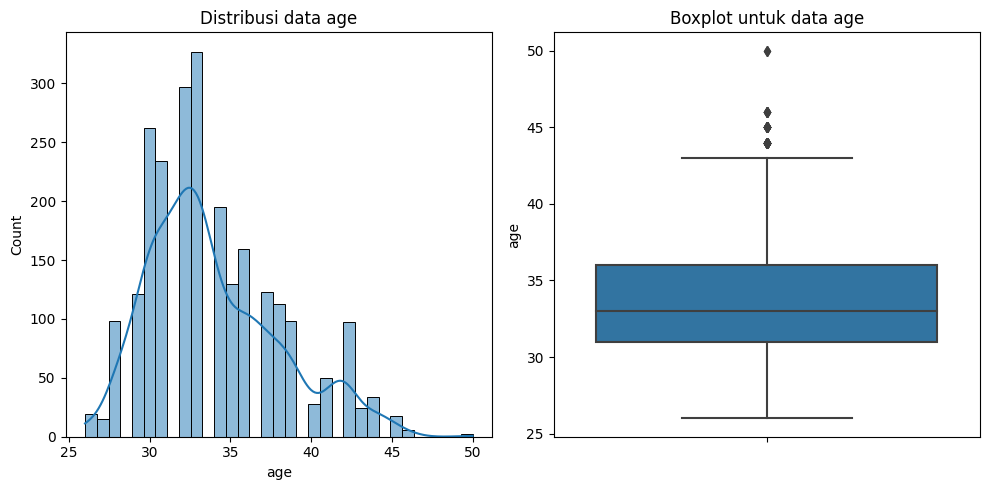

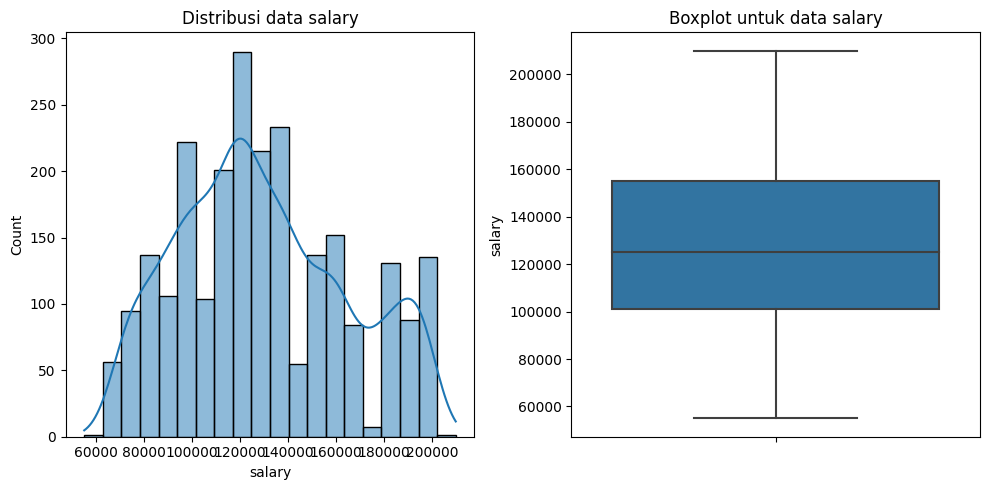

In [37]:
# Visualisasi Analisis Deskriptif
distribusi_data = ['age', 'salary']

for column in distribusi_data:
    plt.figure(figsize=(10, 5))
    
    # Grafik Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi data {column}')
    
    # Grafik Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot untuk data {column}')
    
    plt.tight_layout()
    plt.show()


Berdasarkan grafik histogram dan boxplot:
<ul>
<li> Terlihat bahwa data 'salary' memiliki kurva yang menyerupai bentuk bell-shaped dan hampir simetris dan untuk grafik boxplot juga terlihat nilai outlier yang signifikan, sehingga data ada kecenderungan identik dengan ciri-ciri terdistribusi normal.
<li> Pada data 'age' terlihat distribusi data cenderung miring ke kanan (kemiringan posiitf) mengindikasikan adanya outlier pada data, yang mengindikasikan terdapat nilai-nilai yang jauh di atas rata-rata yang juga dapat diidentifikasi pada boxplot, sehingga ada kecenderungan data tidak terdistribusi normal. 

## Analisis Statistik Inferensial

Untuk meenganalis lebih mendalam terkait adanya Kesenjangan Upah Gender ini, fokus utamanya adalah menjawab apakah ada kemungkinan karyawan dengan berbeda gender tetapi dengan pengalaman kerja dan tingkat pendidikan yang sama tidak menerima gaji yang sama juga? Untuk menjawab terkait hal ini, maka dalam analisis ini akan menggunakan korelasi Spearman. Dalam hal analisis ini akan mengidentifikasi nilai koefisien korelasi peringkat Spearman untuk gender pria dan wanita. Dari hasil koefisien ini, kita dapat menginterpretasikan dan membandingkan bagaimana hubungan antara pengalaman kerja karyawan dengan 'gaji' berkorelasi, dan membandingkan hasil analisis ini terhadap pria dan wanita.

In [58]:
# Instalasi Library
from scipy.stats import spearmanr

# Memisahkan data bedasarkan jenis gender
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

# Melakukan perhitungan Spearman's rank correlation untuk jenis gender Pria
male_corr, male_p_value = spearmanr(male_data['years_of_experience'], male_data['salary'])

# Melakukan perhitungan Spearman's rank correlation untuk jenis gender Pria
female_corr, female_p_value = spearmanr(female_data['years_of_experience'], female_data['salary'])

print(f"Untuk Jenis Gender Pria, hasil koefisien korelasi Spearman's: {male_corr:.2f}, P-value: {male_p_value:.2f}")
print(f"Untuk Jenis Gender Wanita, hasil koefisien korelasi Spearman's: {female_corr:.2f}, P-value: {female_p_value:.2f}")


Untuk Jenis Gender Pria, hasil koefisien korelasi Spearman's: 0.64, P-value: 0.00
Untuk Jenis Gender Wanita, hasil koefisien korelasi Spearman's: 0.44, P-value: 0.00


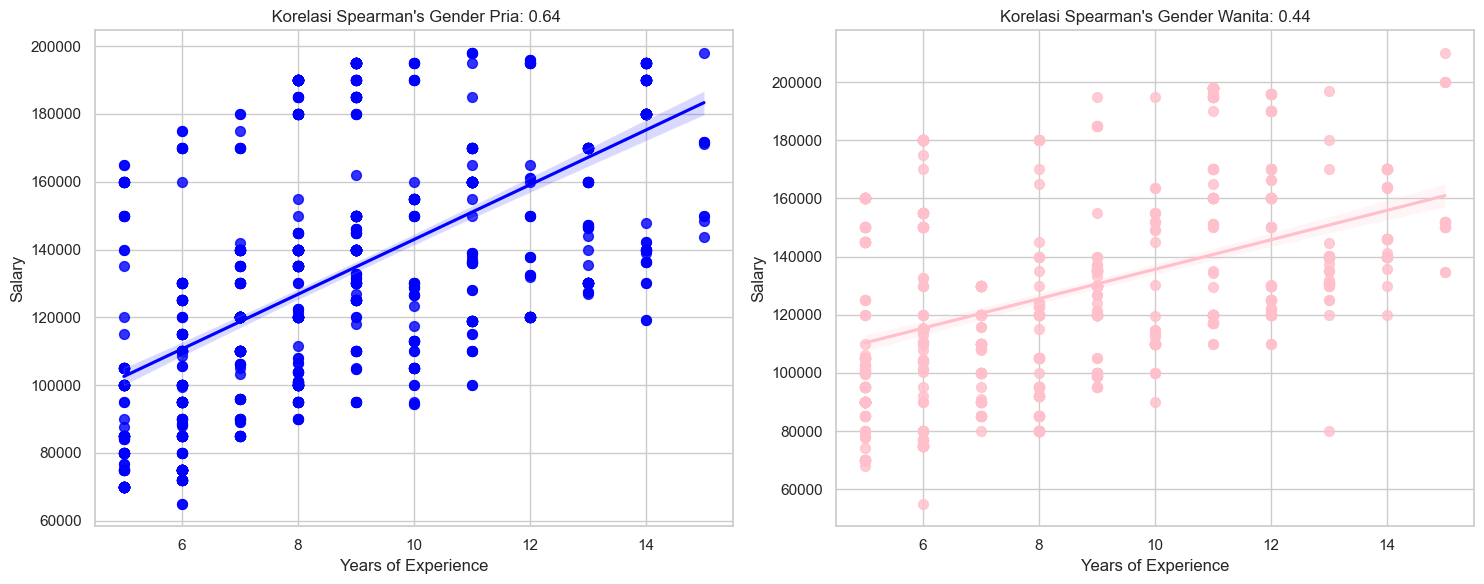

In [61]:
# Memvisualisasikan hasil analisis korelasi dengan seaborn plots
sns.set(style="whitegrid")

# Membuat grafik dengan 2 plot (1 untuk laki-laki and 1 untuk Peremuan)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Grafik untuk plot Laki-laki
sns.regplot(x=male_data['years_of_experience'], y=male_data['salary'], ax=ax[0], color='blue', scatter_kws={'s':50})
ax[0].set_title(f" Korelasi Spearman's Gender Pria: {male_corr:.2f}")
ax[0].set_xlabel('Years of Experience')
ax[0].set_ylabel('Salary')
ax[0].grid(True)

# Grafik untuk plot Perempuan
sns.regplot(x=female_data['years_of_experience'], y=female_data['salary'], ax=ax[1], color='pink', scatter_kws={'s':50})
ax[1].set_title(f"Korelasi Spearman's Gender Wanita: {female_corr:.2f}")
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Salary')
ax[1].grid(True)

plt.tight_layout()
plt.show()


**Interpretasi hasil analisis korelasi Spearman:**    
Menafsirkan nilai Koefisien Spearman:
<ul>
<li> Analisis untuk gender Pria: Koefisien 0,64 menyiratkan adanya hubungan positif yang cukup kuat antara pengalaman kerja karyawan pria dengan gaji yang diperolehnya. Dalam istilah yang lebih sederhana, seiring bertambahnya pengalaman kerja bertahun-tahun, gaji gender pria cenderung meningkat, khsusnya dengan kriteria spesifik pria yang bergelar Sarjana atau Magister dan memiliki pengalaman antara 5 hingga 15 tahun. 
<li> Analisis untuk gender Wanita: Koefisien 0,44 menyiratkan adanya hubungan positif yang moderat atau sedang atara pengalaman kerja karyawan wanita dengan gaji yang diterimanya. Hal ini menunjukkan bahwa meskipun hasil analisis ini menyatakan adanya korelasi yang positif, tetapi kekuatan korelasinya relatif lebih lemah dibandingan dengan gender Pria.
<li> Menafsirkan nilai-P:    
Nilai p value 0,00 (atau sangat mendekati nol) untuk kedua analis berarti bahwa korelasi yang diamati signifikan secara statistik. Dengan kata lain, kecil kemungkinan hubungan yang diamati dari analisis statistik ini terjadi karena faktor kebetulan saja, sehingga dapat dibuktikan kebenarannya secara statistik bahwa pengalaman kerja karywan sangat mempengaruhi gaji yang diterima oleh karyawan maupun karyawati. <il>

# Kesimpulan Analisis

Berdasarkan analisis terhadap data untuk menjawab persoalan utama dalam penelitian ini, dengan analisis statisik penelitian ini menjawab apakah terdapat adanya kesenjangan di antara gender laki-laki dan perempuan terkait dengan gaji atau upaah yang diterima. Berdasarkan data yang dianalisis, hasil penelitian ini menunjukkan bahwa terdapat kecenderungan adanya sedikit kesenjangan diantara upah atau gaji yang terima oleh laki-laki dan perempuan, khusunya di kalangan karyawan atau karyawati yang memiliki pengelaman kerja kisaran 5 sampai dengan 15 tahun dan memiliki background pendidikan gelar sarjana atau pascasarjana.     

Meskipun dari hasil analisis korelasi menunjukkan bawha terdapat hubungan yang positif antara pengalaman kerja dan tingkat gaji yang diterima, akan tetapi perbedaan dalam koefisien Spearman antara laki-laki (0,64) dan perempuan (0,44) menunjukkan bahwa pengalaman kerja profesional yang dimiliki oleh seorang laki-laki memiliki dampak yang lebih besar pada peningkatan gaji yang diperoleh dibandingan dengan perempuan dengan kriteria pendidikan dan pengalaman yang setara. Ini bisa menjadi indikasi kesenjangan upah gender dimana kelpmpok gender perempuan mungkin tidak melihat banyak kenaikan gaji dengan tambahan pengalaman bertahun-tahun seperti yang diterima oleh laki-laki .  

Analisis ini memberikan insight dan wawasan singkat mengenai hubungan antara gender dan kesetaraan upah atau gaji serta keadilan di dalam dunia kerja saat ini. Untuk itu akan lebih bermanfaat untuk melakukan analisis tambahan, seperti analisis regresi, untuk menghitung beberapa faktor secara bersamaan dan mengukur dampak yang lebih komprehensif. Menyelidiki tambahan variabel yang dianalisis akan lebih relevan untuk memberikan pemahaman yang lebih jelas. Misalnya, memeriksa perbedaan industri yang lebih spesifik, peran pekerjaan, indikator kinerja, atau faktor lain yang relevan dapat menjelaskan perbedaan upah yang diamati.